# Лабораторная работа 5

Целью данного задания является приобретение навыков работы с изображениями, обучение и измерение качества моделей свёрточных нейронных сетей при помощи фреймворка Keras.
Задача: Используя нейронные сети, создать модели, которые предсказывают какая цифра отображена на изображении.

Данные: MNIST

Подробнее о данных: https://en.wikipedia.org/wiki/MNIST_database

**1.** Загрузить данные с библиотеки keras MNIST.

`from keras.datasets import mnist` через функцию `load_data`

Распределить данные на тренировочную и валидационную выборки. Посчитать количество экземляров для каждого класса в тренировочной и валидационной выборке. Вычислить какую часть данных от всех составляет валидационная выборка. 

Вывести в виде изображения по одному примеру из каждого класса с указанием какая это цифра в заголовке.

`import matplotlib.pyplot as plt
plt.title(label)
plt.imshow(img)

In [57]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, random_state=42, test_size=.2)

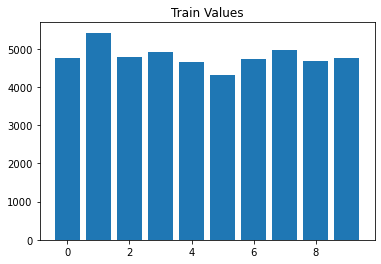

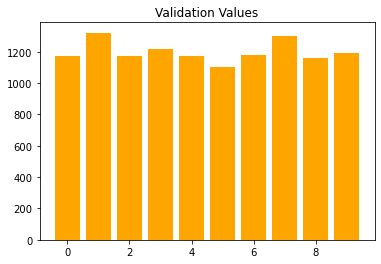

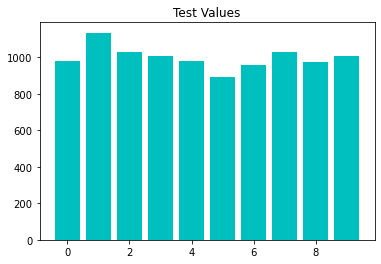

In [4]:
y_train_values, y_train_counts=np.unique(y_train,return_counts=True)
plt.bar(y_train_values, y_train_counts)
plt.title("Train Values")
plt.show()

y_validation_values, y_validation_counts=np.unique(y_validation,return_counts=True)
plt.bar(y_validation_values, y_validation_counts, color = 'orange')
plt.title("Validation Values")
plt.show()

y_test_values, y_test_counts=np.unique(y_test,return_counts=True)
plt.bar(y_test_values, y_test_counts, color='c')
plt.title("Test Values")
plt.show()

In [5]:
len(y_validation)/len(y_train)

0.25

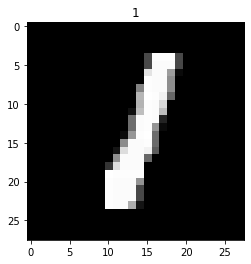

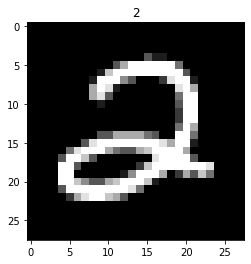

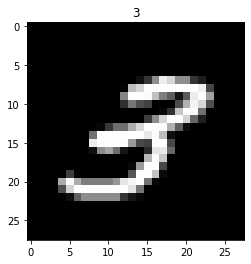

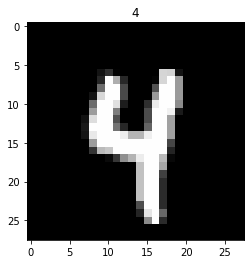

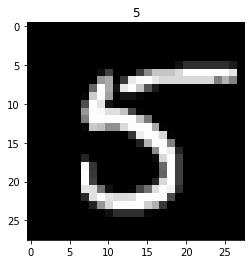

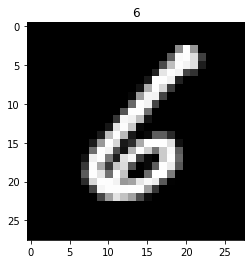

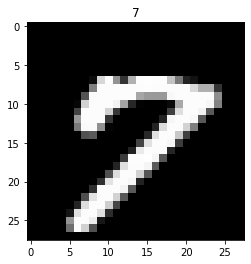

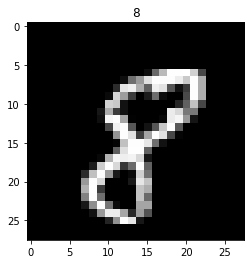

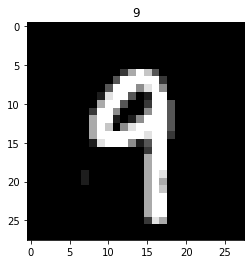

In [6]:
for x in range(1,10):
    plt.title(x)
    plt.imshow(x_train[np.where(y_train == x)[0][0]],cmap='gray')
    plt.show()

**2.** Данные необходимо предобработать: поменять тип данных на *float32*, произвести *MinMax* нормализацию данных

In [7]:
x_train=x_train.astype('float32')
x_validation=x_validation.astype('float32')
x_test=x_test.astype('float32')

In [8]:
x_train=(x_train/255.)
x_validation=(x_validation/255.)
x_test=(x_test/255.)

**3.** Постройте несколько архтектур нейронных сетей (!После каждого эксперимента построить графики функции потерь и метрик):

* Три полносвязных слоя
* Один сверточный слой, один полносвязный
* Два сверточных слоя, один полносвязный
* Три сверточных слоя, один полносвязный
* Два сверточных слоя, два полносвязных
* На лучшую архитектуру дополнительно добавить между слоями:
    * *MaxPooling*
    * *Dropout*
    * *BatchNormalization*
* Обучит модели и подобрать архитектуру с наилучшим скором на валидационной выборке (`model.evaluate`)

`from keras.layers impot Dense, Conv2D, Flatten, BatchNormalization ...`


* Обучать свёрточные слои с числом фильтров (16, 32, 64)
* Обучать свёрточные слои с padding *same*
* Размер пулингового окна 3х3
* Функции активации в слоях *ReLU*
* Обучать модели с оптимизаторами лосса *SGD* или *Adam*
* Обучать модели с падением скорости обучения (learning rate) в оптимизаторах лоса по технике step decay
* Обучать модели числом эпох 15, 20, 30

**Tip:** Важно встроить в модель Flatten слой после сверточных.

# Три полносвязных слоя

In [51]:
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D

In [30]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


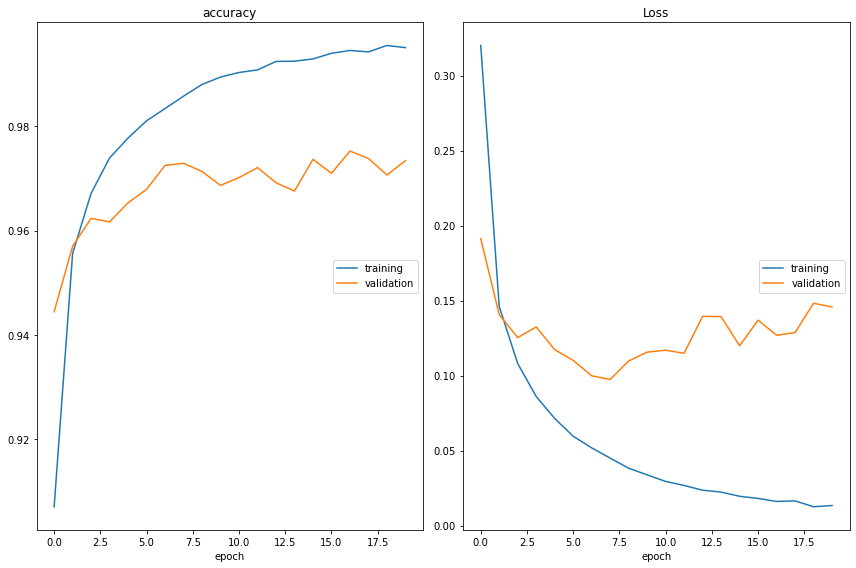

accuracy
	training         	 (min:    0.907, max:    0.996, cur:    0.995)
	validation       	 (min:    0.944, max:    0.975, cur:    0.973)
Loss
	training         	 (min:    0.013, max:    0.320, cur:    0.013)
	validation       	 (min:    0.098, max:    0.191, cur:    0.146)
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0134 - accuracy: 0.9951 - val_loss: 0.1458 - val_accuracy: 0.9734


In [32]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs = 20, callbacks=[PlotLossesKeras()])

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 920us/step - loss: 0.1442 - accuracy: 0.9701


[0.1442398726940155, 0.9700999855995178]

# Один сверточный, один полносвязный

In [34]:
model_2 = keras.Sequential()
model_2.add(keras.Input(shape=(28,28,1)))
model_2.add(Conv2D(32, kernel_size=(3, 3),padding='same', activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(10, activation="softmax"))
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 10)                250890    
                                                                 
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


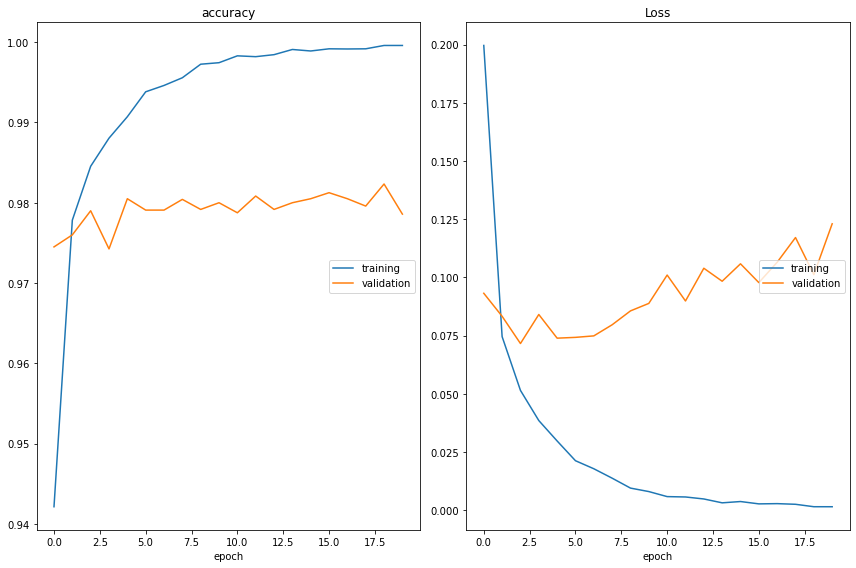

accuracy
	training         	 (min:    0.942, max:    1.000, cur:    1.000)
	validation       	 (min:    0.974, max:    0.982, cur:    0.979)
Loss
	training         	 (min:    0.001, max:    0.200, cur:    0.001)
	validation       	 (min:    0.072, max:    0.123, cur:    0.123)
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1230 - val_accuracy: 0.9786


In [36]:
history = model_2.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs = 20, callbacks=[PlotLossesKeras()])

In [37]:
model_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9796


[0.10467193275690079, 0.9796000123023987]

# Два сверточных слоя, один полносвязный

In [38]:
model_3 = keras.Sequential()
model_3.add(keras.Input(shape=(28,28,1)))
model_3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
model_3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"))
model_3.add(Flatten())
model_3.add(Dense(10, activation="softmax"))
model_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_17 (Dense)            (None, 10)                250890    
                                                                 
Total params: 269,994
Trainable params: 269,994
Non-trainable params: 0
_________________________________________________________________


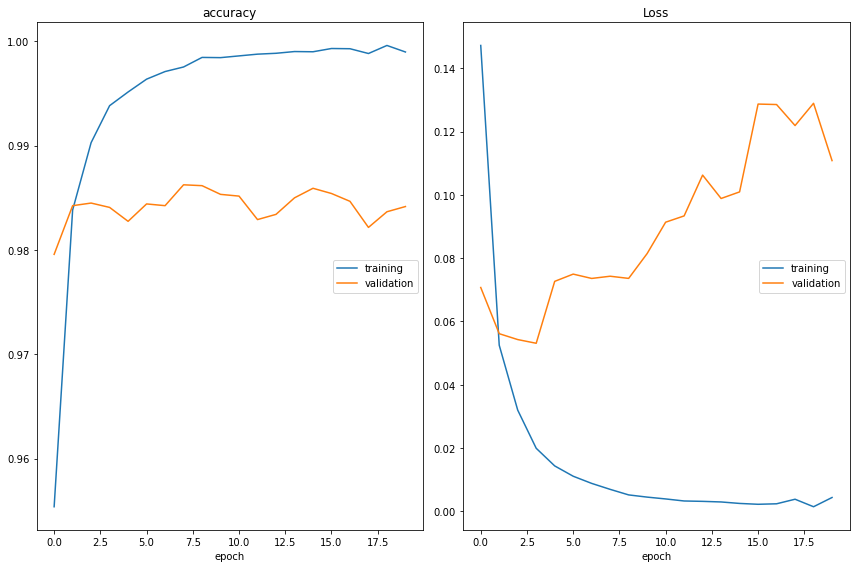

accuracy
	training         	 (min:    0.955, max:    1.000, cur:    0.999)
	validation       	 (min:    0.980, max:    0.986, cur:    0.984)
Loss
	training         	 (min:    0.001, max:    0.147, cur:    0.004)
	validation       	 (min:    0.053, max:    0.129, cur:    0.111)
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.1108 - val_accuracy: 0.9842


In [40]:
history = model_3.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs = 20, callbacks=[PlotLossesKeras()])

In [41]:
model_3.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1202 - accuracy: 0.9849


[0.12020346522331238, 0.9848999977111816]

# Три сверточных слоя, один полносвязный

In [42]:
model_4 = keras.Sequential()
model_4.add(keras.Input(shape=(28,28,1)))
model_4.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
model_4.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"))
model_4.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation="relu"))
model_4.add(Flatten())
model_4.add(Dense(10, activation="softmax"))
model_4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 flatten_8 (Flatten)         (None, 12544)             0         
                                                                 
 dense_18 (Dense)            (None, 10)                125450    
                                                                 
Total params: 149,178
Trainable params: 149,178
Non-trainable params: 0
_________________________________________________________________


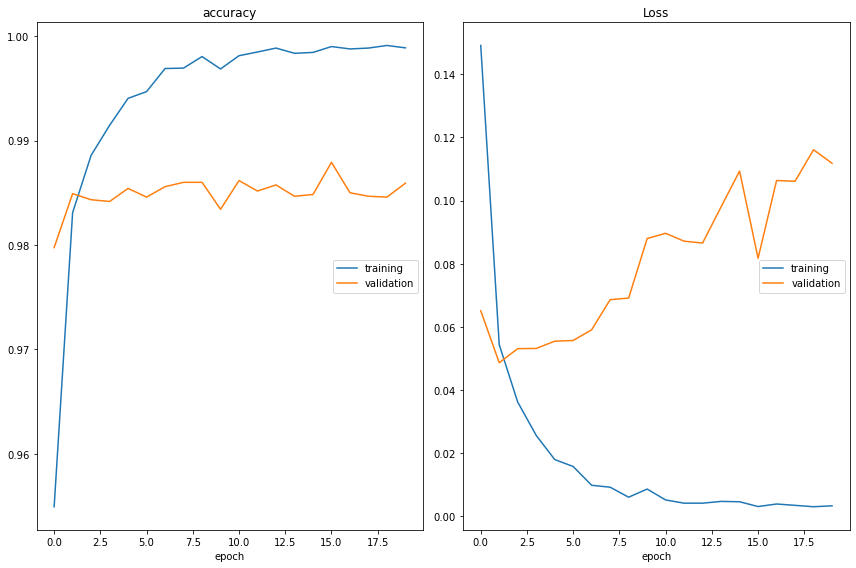

accuracy
	training         	 (min:    0.955, max:    0.999, cur:    0.999)
	validation       	 (min:    0.980, max:    0.988, cur:    0.986)
Loss
	training         	 (min:    0.003, max:    0.149, cur:    0.003)
	validation       	 (min:    0.049, max:    0.116, cur:    0.112)
1500/1500 [==============================] - 91s 61ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.1118 - val_accuracy: 0.9859


In [44]:
history = model_4.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs = 20, callbacks=[PlotLossesKeras()])

In [45]:
model_4.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0930 - accuracy: 0.9863


[0.0930355116724968, 0.986299991607666]

Два сверточных слоя, два полносвязных

In [46]:
model_5 = keras.Sequential()
model_5.add(keras.Input(shape=(28,28,1)))
model_5.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"))
model_5.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
model_5.add(Flatten())
model_5.add(Dense(16, activation="relu"))
model_5.add(Dense(10, activation="softmax"))
model_5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 flatten_9 (Flatten)         (None, 50176)             0         
                                                                 
 dense_19 (Dense)            (None, 16)                802832    
                                                                 
 dense_20 (Dense)            (None, 10)                170       
                                                                 
Total params: 821,818
Trainable params: 821,818
Non-trainable params: 0
_________________________________________________________________


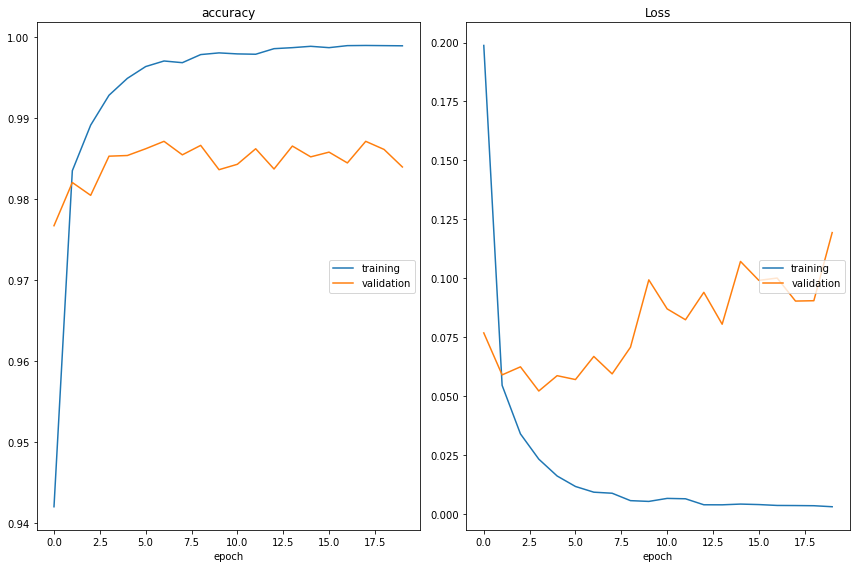

accuracy
	training         	 (min:    0.942, max:    0.999, cur:    0.999)
	validation       	 (min:    0.977, max:    0.987, cur:    0.984)
Loss
	training         	 (min:    0.003, max:    0.199, cur:    0.003)
	validation       	 (min:    0.052, max:    0.119, cur:    0.119)
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.1193 - val_accuracy: 0.9840


In [48]:
history = model_5.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs = 20, callbacks=[PlotLossesKeras()])

In [49]:
model_5.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1244 - accuracy: 0.9826


[0.12438104301691055, 0.9825999736785889]

# Лучшая

In [52]:
model_best = keras.Sequential()
model_best.add(keras.Input(shape=(28,28,1)))
model_best.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
model_best.add(MaxPooling2D((2, 2), strides=2))
model_best.add(BatchNormalization())
model_best.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation="relu"))
model_best.add(BatchNormalization())
model_best.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation="relu"))
model_best.add(MaxPooling2D((2, 2), strides=2))
model_best.add(BatchNormalization())
model_best.add(Flatten())
model_best.add(Dense(10, activation="softmax"))
model_best.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model_best.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                     

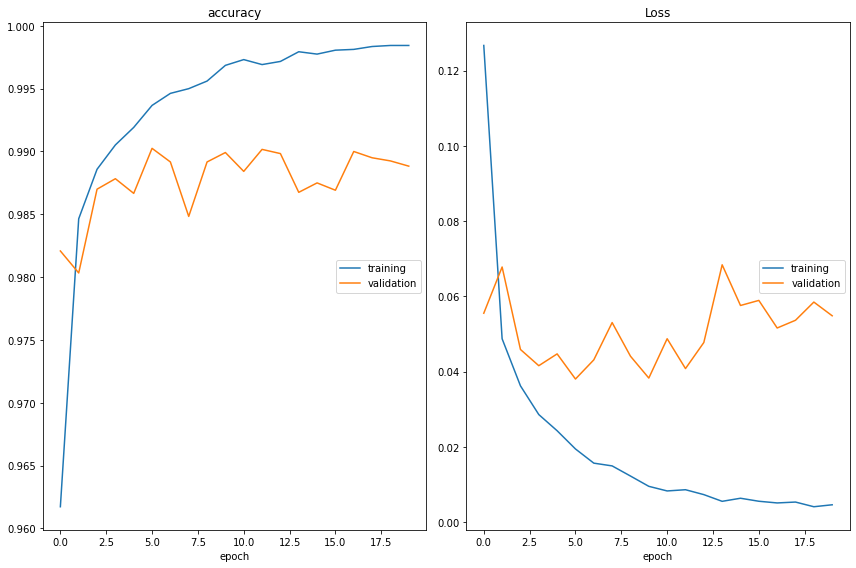

accuracy
	training         	 (min:    0.962, max:    0.998, cur:    0.998)
	validation       	 (min:    0.980, max:    0.990, cur:    0.989)
Loss
	training         	 (min:    0.004, max:    0.127, cur:    0.005)
	validation       	 (min:    0.038, max:    0.068, cur:    0.055)
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0549 - val_accuracy: 0.9888


In [54]:
history = model_best.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs = 20, callbacks=[PlotLossesKeras()])

In [71]:
model_best.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0536 - accuracy: 0.9883


[0.05363928899168968, 0.9883000254631042]

**4.** Вывести в виде изображения по одному примеру из каждого класса с указанием результата работы лучшей модели в заголовке

**Tip:** https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

In [75]:
prediction = model_best.predict(x_test)
prediction = prediction.argmax(axis=1)

313/313 [==============================] - 3s 9ms/step


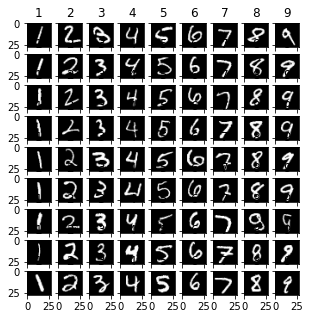

In [91]:
fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(9,9),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
i = 1
key = 0
for ax in grid:
    # Iterating over the grid returns the Axes.
    ax.imshow(x_test[np.where(prediction == i)[0][key]],cmap='gray')
    ax.set_title(i)
    i+=1
    if i == 10:
        i = 1
        key += 1

plt.show()